Import necessary libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA


Load the dataset

In [2]:
df = pd.read_csv('Mall_Customers.csv')
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [4]:
df.describe()


,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


Selecting relevant features

In [5]:
features = df[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']]

Standarize the features to have zero mean and unit variance

In [6]:
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)

Determing optimal number of clusters using Elbow method

In [8]:
inertia = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=42, n_init=10)
    kmeans.fit(features_scaled)
    inertia.append(kmeans.inertia_)

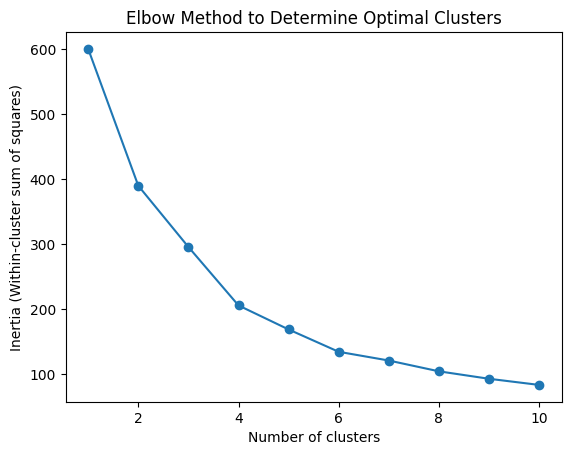

In [9]:
# Plot the Elbow graph
plt.plot(range(1, 11), inertia, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia (Within-cluster sum of squares)')
plt.title('Elbow Method to Determine Optimal Clusters')
plt.show()

Choosing optimal number of cluster using graph

In [10]:
optimal_clusters = 3

Applying K-means clustering with the chosen number of clusters

In [13]:
kmeans = KMeans(n_clusters=optimal_clusters, random_state=42,n_init=10)
df['Cluster'] = kmeans.fit_predict(features_scaled)

Visualing the clusters in a 3D plot

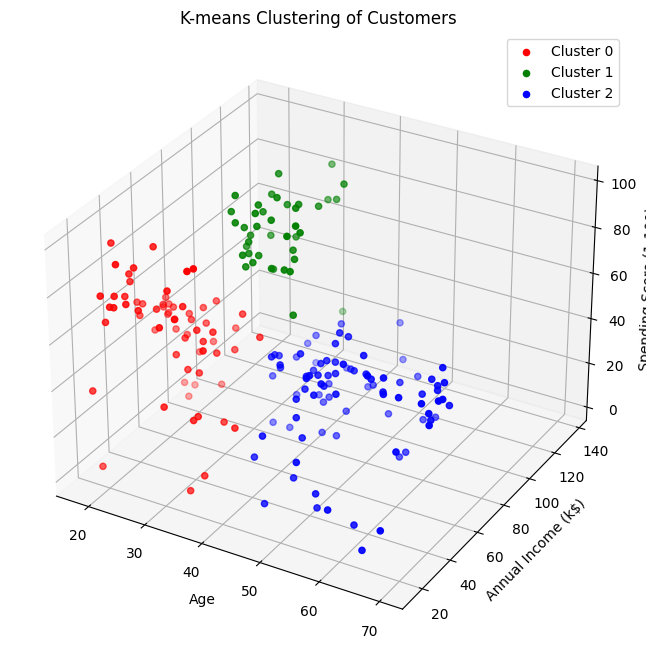

In [16]:
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

colors = ['red', 'green', 'blue']
for cluster, color in zip(range(optimal_clusters), colors):
    cluster_data = df[df['Cluster'] == cluster]
    ax.scatter(cluster_data['Age'], cluster_data['Annual Income (k$)'], cluster_data['Spending Score (1-100)'],
               c=color, label=f'Cluster {cluster}')

ax.set_xlabel('Age')
ax.set_ylabel('Annual Income (k$)')
ax.set_zlabel('Spending Score (1-100)')
ax.set_title('K-means Clustering of Customers')
ax.legend()
plt.show()
